In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")
tokenizer.save_pretrained("./deberta_tokenizer")


c:\Users\aquan\anaconda3\envs\nbme\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\aquan\anaconda3\envs\nbme\lib\site-packages\transformers\convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


('./deberta_tokenizer\\tokenizer_config.json',
 './deberta_tokenizer\\special_tokens_map.json',
 './deberta_tokenizer\\spm.model',
 './deberta_tokenizer\\added_tokens.json',
 './deberta_tokenizer\\tokenizer.json')

                                          pn_history  pn_length
0  17-year-old male, has come to the student heal...        695
1  17 yo male with recurrent palpitations for the...        424
2  Dillon Cleveland is a 17 y.o. male patient wit...        835
3  a 17 yo m c/o palpitation started 3 mos ago; \...        700
4  17yo male with no pmh here for evaluation of p...        948
pn_history 長度分位數（字元數）:
50% 的樣本小於 859 字
75% 的樣本小於 859 字
80% 的樣本小於 943 字
90% 的樣本小於 948 字
95% 的樣本小於 950 字
99% 的樣本小於 950 字

平均字數（mean）: 818.18 字
最大字數（max）: 950 字


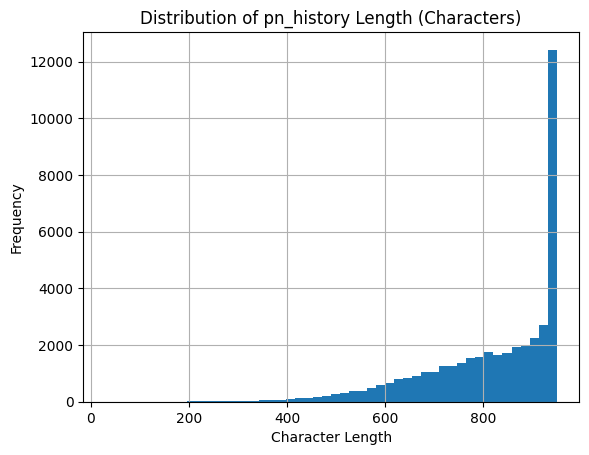

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
df = pd.read_csv("C://AI_class//113_2NLP//FP//nbme//patient_notes.csv")

# 計算每筆文字的字元長度
df["pn_length"] = df["pn_history"].str.len()

# 顯示前幾筆資料
print(df[["pn_history", "pn_length"]].head())

# 計算分位數
print(df["token_length"].describe(percentiles=[.5, .75, .8, .9, .95, .99]))

mean_length = df["pn_length"].mean()
max_length = df["pn_length"].max()
print(f"\n平均字數（mean）: {mean_length:.2f} 字")
print(f"最大字數（max）: {max_length} 字")

# 繪製直方圖
plt.hist(df["pn_length"], bins=50)
plt.title("Distribution of pn_history Length (Characters)")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


count    42146.000000
mean       189.903122
std         31.243296
min         13.000000
50%        195.000000
75%        211.000000
80%        214.000000
90%        223.000000
95%        231.000000
99%        255.000000
max        325.000000
Name: token_length, dtype: float64


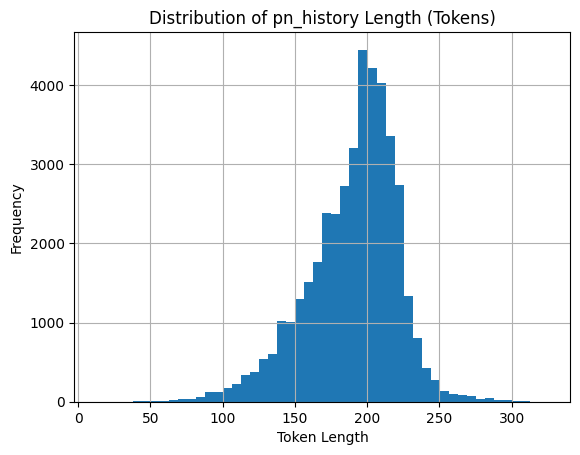

In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 讀入資料
df = pd.read_csv("C://AI_class//113_2NLP//FP//nbme//patient_notes.csv")

# 載入 tokenizer
tokenizer = AutoTokenizer.from_pretrained("C://AI_class//113_2NLP//FP//deberta-v3-base")

# 計算每段 pn_history 的 token 長度
df["token_length"] = df["pn_history"].apply(lambda x: len(tokenizer(x, truncation=False)["input_ids"]))

# 顯示一些統計數據
print(df["token_length"].describe(percentiles=[.5, .75, .8, .9, .95, .99]))
mean_length = df["pn_length"].mean()
max_length = df["pn_length"].max()
print(f"\n平均字數（mean）: {mean_length:.2f} 字")
print(f"最大字數（max）: {max_length} 字")

# 繪製直方圖
plt.hist(df["token_length"], bins=50)
plt.title("Distribution of pn_history Length (Tokens)")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


count    143.000000
mean       9.783217
std        6.060888
min        3.000000
50%        8.000000
75%       13.000000
80%       14.000000
90%       18.800000
95%       22.900000
99%       26.740000
max       30.000000
Name: token_length, dtype: float64


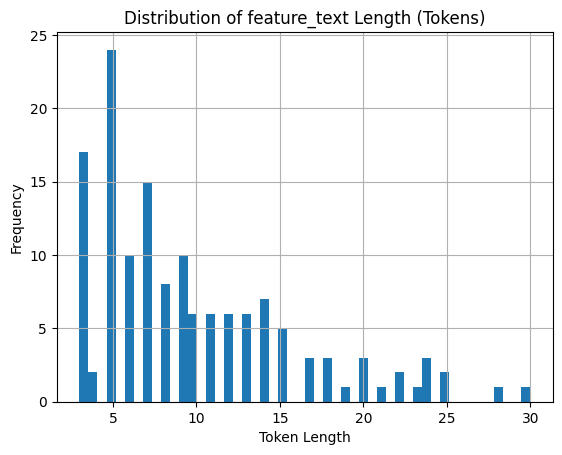

In [6]:
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀入資料
df = pd.read_csv("C:/AI_class/113_2NLP/FP/nbme/features.csv")

# 移除缺失值
df = df.dropna(subset=["feature_text"])

# 載入 tokenizer
tokenizer = AutoTokenizer.from_pretrained("C:/AI_class/113_2NLP/FP/deberta-v3-base/", local_files_only=True)

# 計算每段 pn_history 的 token 長度
df["token_length"] = df["feature_text"].apply(lambda x: len(tokenizer(x, truncation=False)["input_ids"]))

# 顯示一些統計數據
print(df["token_length"].describe(percentiles=[.5, .75, .8, .9, .95, .99]))

# 繪製直方圖
plt.hist(df["token_length"], bins=50)
plt.title("Distribution of feature_text Length (Tokens)")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# 載入 CSV 檔案
file_path = r"C:\AI_class\113_2NLP\FP\nbme\features.csv"  
df = pd.read_csv(file_path)

# 選擇要分析的欄位
column_name = 'feature_num'  

# 查看欄位的前幾筆資料（確認欄位內容）
print(df[column_name].head())

# 統計欄位中每個值的出現次數
value_counts = df[column_name].value_counts()

# 顯示出現次數前 10 名
print("total feature_num ：", df['feature_num'].count())
print("top 10 value counts:")
print(value_counts.head(10))

# 顯示總共有多少種唯一值
print(f"total unique values：{df[column_name].nunique()}")


0    0
1    1
2    2
3    3
4    4
Name: feature_num, dtype: int64
total feature_num ： 143
top 10 value counts:
feature_num
0      1
611    1
605    1
606    1
607    1
608    1
609    1
610    1
700    1
603    1
Name: count, dtype: int64
total unique values：143


In [ ]:
import pandas as pd

# 載入 CSV 檔案
file_path = r"C:\AI_class\113_2NLP\FP\nbme\features.csv" 
df = pd.read_csv(file_path)

# 選擇要分析的欄位
column_name = 'case_num' 

# 查看欄位的前幾筆資料（確認欄位內容）
print(df[column_name].head())

# 統計欄位中每個值的出現次數
value_counts = df[column_name].value_counts()

# 顯示出現次數前 10 名
print("total case_num ：", df['case_num'].count())
print("top 10 value counts:")
print(value_counts.head(10))

# 顯示總共有多少種唯一值
print(f"total unique values：{df[column_name].nunique()}")


0    0
1    0
2    0
3    0
4    0
Name: case_num, dtype: int64
total case_num ： 143
top 10 value counts:
case_num
5    18
8    18
2    17
9    17
3    16
0    13
1    13
6    12
4    10
7     9
Name: count, dtype: int64
total unique values：10


In [ ]:
import pandas as pd

# 載入 CSV 檔案
file_path = r"C:\AI_class\113_2NLP\FP\nbme\features.csv"  
df = pd.read_csv(file_path)

# 選擇要分析的欄位
column_name = 'feature_text'  

# 查看欄位的前幾筆資料（確認欄位內容）
print(df[column_name].head())

# 統計欄位中每個值的出現次數
value_counts = df[column_name].value_counts()

# 顯示出現次數前 10 名
print("total feature_text ：", df['feature_text'].count())
print("top 10 value counts:")
print(value_counts.head(10))

# 顯示總共有多少種唯一值
print(f"total unique values：{df[column_name].nunique()}")

#
duplicate_values = df['feature_text'].value_counts()
duplicate_values = duplicate_values[duplicate_values > 1].index

# 篩選出這些值的所有 row
duplicates_df = df[df['feature_text'].isin(duplicate_values)]

# 印出重複資料
print("以下是 feature_text 欄位中重複的資料列：")
print(duplicates_df)

0    Family-history-of-MI-OR-Family-history-of-myoc...
1                   Family-history-of-thyroid-disorder
2                                       Chest-pressure
3                                Intermittent-symptoms
4                                          Lightheaded
Name: feature_text, dtype: object
total feature_text ： 143
top 10 value counts:
feature_text
Female                                                             7
Male                                                               3
20-year                                                            2
Nausea                                                             2
35-year                                                            2
17-year                                                            2
Family-history-of-MI-OR-Family-history-of-myocardial-infarction    1
Worse-with-deep-breath-OR-pleuritic                                1
Chest-pain                                                         1
Duration-x-

#Patient note

In [ ]:

# 載入 CSV 檔案
file_path = r"C:\AI_class\113_2NLP\FP\nbme\patient_notes.csv" 
df = pd.read_csv(file_path)

# 選擇要分析的欄位
column_name = 'pn_history' 

# 查看欄位的前幾筆資料（確認欄位內容）
print(df[column_name].head())

# 統計欄位中每個值的出現次數
value_counts = df[column_name].value_counts()

# 顯示出現次數前 10 名
print("total pn_history ：", df['pn_history'].count())
print("top 10 value counts:")
print(value_counts.head(10))

# 顯示總共有多少種唯一值
print(f"total unique values：{df[column_name].nunique()}")


0    17-year-old male, has come to the student heal...
1    17 yo male with recurrent palpitations for the...
2    Dillon Cleveland is a 17 y.o. male patient wit...
3    a 17 yo m c/o palpitation started 3 mos ago; \...
4    17yo male with no pmh here for evaluation of p...
Name: pn_history, dtype: object
total pn_history ： 42146
top 10 value counts:
pn_history
17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguan